# Statistial Simulation Using Python

Probability is the study of random phenomena. Random variables can be broken down into two broader categories: discrete and continuous. 

Discrete random variables can take on only a finite number of values, while continuous random variables can take on any value within a range. The probability of a discrete random variable taking on a particular value is called a probability mass function (PMF). The probability of a continuous random variable taking on a particular value is called a probability density function (PDF). The probability of a continuous random variable taking on a value between two numbers is called a cumulative distribution function (CDF).

#### Import Libraries

In [52]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import itertools

import statsmodels.api as sm
import basic.basic_functions as bf
base_folder, data, archive, output = bf.set_folders()

Not Running on Colab
Base Folder is C:\Users\abdul\OneDrive\Documents\MSBA
Data Folder is C:\Users\abdul\OneDrive\Documents\MSBA\data_sets
Archive Folder is C:\Users\abdul\OneDrive\Documents\MSBA\archive
Output Folder is C:\Users\abdul\OneDrive\Documents\MSBA\output
The path to the custom functions is C:/Users/abdul/OneDrive/Documents/MSBA/custom_functions
The working directory is c:\Users\abdul\OneDrive\Documents\MSBA\notebooks\Statistics


#### Import Data

In [8]:
attrition_pop = pd.read_feather(data/"attrition.feather")

In [3]:
# Initialize seed and parameters
np.random.seed(586852)

In [4]:
deck_of_cards = [(i,j) for i in ['Heart','Club','Diamond','Spade'] for j in range(0,13)]
np.random.shuffle(deck_of_cards)
# Print out the top three cards
card_choices_after_shuffle = deck_of_cards[:3]
print(card_choices_after_shuffle)

[('Spade', 2), ('Diamond', 2), ('Spade', 3)]


## Simulation Basics

**Steps to perform a simulation:**
1. Define possible outcomes
2. Assign probabilities to each outcome
3. Define relationships between variables
4. Repeat the process a large number of times 
5. Analyze the results


In [5]:
# Below is the code for the dice roll simulation
# If the player rolls the same number on both dice, they win
dice, probabilities, num_of_dice = [1,2,3,4,5,6], [1/6,1/6,1/6,1/6,1/6,1/6], 2
sims, wins = 100, 0
for i in range(sims):
    dice_rolls = np.random.choice(dice, size=num_of_dice, p=probabilities)
    if dice_rolls[0] == dice_rolls[1]:
        wins += 1

print(f'Out of {sims} simulations, the number of times the dice rolled the same number is {wins}')

Out of 100 simulations, the number of times the dice rolled the same number is 10


Simulations are useful to understand the behavior of a system. They are also useful to understand the behavior of a system under different conditions. Another example is trying to predict if a person will win the lottery. The lottery is a random process, so we can use a simulation to predict the outcome.

In [6]:
# Initialize size and simulate outcome
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 10000
chance_of_winning = 1/num_tickets
size = 2000
payoffs = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
probs = [1-chance_of_winning, chance_of_winning]
outcomes = np.random.choice(a=payoffs, size=size, p=probs, replace=True)
# Mean of outcomes.
answer = np.mean(outcomes)
print("Average payoff from {} simulations = {}".format(size, answer))

Average payoff from 2000 simulations = 5.0


In [7]:
# Initialize simulations and cost of ticket
sims, lottery_ticket_cost = 3000, 0

# Use a while loop to increment `lottery_ticket_cost` till average value of outcomes falls below zero
while 1:
    outcomes = np.random.choice([-lottery_ticket_cost, grand_prize-lottery_ticket_cost],
                 size=sims, p=[1-chance_of_winning, chance_of_winning], replace=True)
    if outcomes.mean() < 0:
        break
    else:
        lottery_ticket_cost += 1
answer = lottery_ticket_cost - 1

print("The highest price at which it makes sense to buy the ticket is {}".format(answer))

The highest price at which it makes sense to buy the ticket is 3


Lets work on some examples of probability and simulation.

In [8]:
# Shuffle deck & count card occurrences in the hand
n_sims, two_kind = 10000, 0
for i in range(n_sims):
    np.random.shuffle(deck_of_cards)
    hand, cards_in_hand = deck_of_cards[0:5], {}
    for [suite, numeric_value] in hand:
        # Count occurrences of each numeric value
        cards_in_hand[numeric_value] = cards_in_hand.get(numeric_value, 0) + 1
    
    # Condition for getting at least 2 of a kind
    if max(cards_in_hand.values()) >=2: 
        two_kind += 1

print("Probability of seeing at least two of a kind = {} ".format(two_kind/n_sims))

Probability of seeing at least two of a kind = 0.484 


In [9]:
# Pre-set constant variables
deck, sims, coincidences = np.arange(1, 14), 10000, 0

for _ in range(sims):
    # Draw all the cards without replacement to simulate one game
    draw = np.random.choice(deck, size=13, replace=False) 
    # Check if there are any coincidences
    coincidence = (draw == list(np.arange(1, 14))).any()
    if coincidence == True:
        coincidences += 1

# Calculate probability of winning
prob_of_winning = 1-coincidences/sims
print("Probability of winning = {}".format(prob_of_winning))

Probability of winning = 0.37960000000000005


In [10]:
# _ in range(10) is a dummy variable that is not used in the loop. It is used to iterate over the loop 10 times.
# The loop is used to simulate 10 games of the game show.
for _ in range(10):
    # Draw a card from the deck
    draw = np.random.choice(deck, size=1, replace=False)
    # Check if the card drawn is a heart
    if draw == 1:
        print("You win!")
    else:
        print("You lose!")

You win!
You lose!
You win!
You lose!
You lose!
You lose!
You lose!
You lose!
You lose!
You lose!


We have an urn that contains 7 white and 6 black balls. Four balls are drawn at random. We'd like to know the probability that the first and third balls are white, while the second and the fourth balls are black.

In [11]:
# Initialize success, sims and urn
success, sims = 0, 5000
urn = ['w']*7 + ['b']*6

for _ in range(sims):
    # Draw 4 balls without replacement
    draw = np.random.choice(urn, replace=False, size=4)
    # Count the number of successes
    if (draw[0] == 'w') & (draw[1] == 'b') & (draw[2] == 'w') & (draw[3] == 'b'):
        success +=1

print("Probability of success = {}".format(success/sims))

Probability of success = 0.0698


Now we'll use simulation to solve a famous probability puzzle - the birthday problem. It sounds quite straightforward - How many people do you need in a room to ensure at least a 50% chance that two of them share the same birthday?

With 366 people in a 365-day year, we are 100% sure that at least two have the same birthday, but we only need to be 50% sure. Simulation gives us an elegant way of solving this problem.

Upon completion of this exercise, you will begin to understand how to cast problems in a simulation framework.

In [12]:
# Draw a sample of birthdays & check if each birthday is unique
days = np.arange(1,366,1)
people = 25

def birthday_sim(people):
    sims, unique_birthdays = 2000, 0 
    for _ in range(sims):
        draw = np.random.choice(days, size=people, replace=True)
        if len(draw) == len(set(draw)): 
            unique_birthdays += 1
    out = 1 - unique_birthdays / sims
    return out

# Break out of the loop if probability greater than 0.5
while (people > 0):
    prop_bds = birthday_sim(people)
    if prop_bds > 0.5: 
        break
    people += 1

print("With {} people, there's a 50% chance that two share a birthday.".format(people))

With 25 people, there's a 50% chance that two share a birthday.


In [13]:
#Shuffle deck & count card occurrences in the hand
n_sims, full_house, deck_of_cards = 50000, 0, deck_of_cards.copy() 
for i in range(n_sims):
    np.random.shuffle(deck_of_cards)
    hand, cards_in_hand = deck_of_cards[0:5], {}
    for card in hand:
        # Use .get() method to count occurrences of each card
        cards_in_hand[card[1]] = cards_in_hand.get(card[1], 0) + 1
        
    # Condition for getting full house
    condition = (max(cards_in_hand.values()) ==3) & (min(cards_in_hand.values())==2)
    if condition: 
        full_house += 1
print("Probability of seeing a full house = {}".format(full_house/n_sims))

Probability of seeing a full house = 0.00134


## DGP and Simulation 

A data generating process (DGP) is a model that describes how data is generated. It is a model that describes the relationship between the variables in a dataset. The DGP is the foundation of statistical inference. The below example is for cricket match between England and Pakistan

In [14]:
sims, outcomes, p_rain, p_pass = 1000, [], 0.40, {'sun':0.9, 'rain':0.3}

def test_outcome(p_rain):
    # Simulate whether it will rain or not
    weather = np.random.choice(['rain', 'sun'], p=[p_rain, 1-p_rain])
    # Simulate and return whether you will pass or fail
    test_result = np.random.choice(['pass', 'fail'], p=[p_pass[weather], 1-p_pass[weather]])
    return test_result

for _ in range(sims):
    outcomes.append(test_outcome(p_rain))

# Calculate fraction of outcomes where you pass
pass_fraction = outcomes.count('pass')/len(outcomes)
print("Probability of Passing the driving test = {}".format(pass_fraction))

Probability of Passing the driving test = 0.653


**National elections** 

Consider national elections in a country with two political parties - Red and Blue. This country has 50 states and the party that wins the most states wins the elections. You have the probability 
 of Red winning in each individual state and want to know the probability of Red winning nationally.

Let's model the DGP to understand the distribution. Suppose the election outcome in each state follows a binomial distribution with probability such that $0$ indicates a loss for Red and $1$ indicates a win. We then simulate a number of election outcomes. Finally, we can ask rich questions like what is the probability of Red winning less than 45% of the states?

In [15]:
#create random array of 50 probabilities
p = np.random.random(50)
outcomes, sims, probs = [], 1000, p

for _ in range(sims):
    # Simulate elections in the 50 states
    election = np.random.binomial(1, probs, size=50)
    # Get average of Red wins and add to `outcomes`
    outcomes.append(election.mean())

# Calculate probability of Red winning in less than 45% of the states
prob_red_wins = sum([1 for i in outcomes if i < 0.45])/sims
print(f"Probability of Red winning in less than 45% of the states = {prob_red_wins}")

Probability of Red winning in less than 45% of the states = 0.386


**Fitness goal**

Let's model how activity levels impact weight loss using modern fitness trackers. On days when you go to the gym, you average around 15k steps, and around 5k steps otherwise. You go to the gym 40% of the time. Let's model the step counts in a day as a Poisson random variable with a mean $\lambda$ dependent on whether or not you go to the gym.

For simplicity, let’s say you have an 80% chance of losing 1lb and a 20% chance of gaining 1lb when you get more than 10k steps. The probabilities are reversed when you get less than 8k steps. Otherwise, there's an even chance of gaining or losing 1lb. Given all this information, find the probability of losing weight in a month.

In [16]:
sims, days = 1000, 30

# Simulate steps & choose prob 
for _ in range(sims):
    w = []
    for i in range(days):
        lam = np.random.choice([5000, 15000], p=[0.6, 0.4], size=1)
        steps = np.random.poisson(lam)
        if steps > 10000: 
            prob = [0.2, 0.8]
        elif steps < 8000: 
            prob = [0.8,0.2]
        else:
            prob = [0.5, 0.5]
        w.append(np.random.choice([1, -1], p=prob))
    outcomes.append(sum(w))

# Calculate fraction of outcomes where there was a weight loss
weight_loss_outcomes_frac = sum([1 for i in outcomes if i < 0]) / sims
print("Probability of Weight Loss = {}".format(weight_loss_outcomes_frac))

Probability of Weight Loss = 0.195


**Sign-up Flow**

We will now model the DGP of an eCommerce ad flow starting with sign-ups.

On any day, we get many ad impressions, which can be modeled as Poisson random variables (RV). You are told that $\lambda$ is normally distributed with a mean of 100k visitors and standard deviation 2000.

During the signup journey, the customer sees an ad, decides whether or not to click, and then whether or not to signup. Thus both clicks and signups are binary, modeled using binomial RVs. What about probability 
 of success? Our current low-cost option gives us a click-through rate of 1% and a sign-up rate of 20%. A higher cost option could increase the clickthrough and signup rate by up to 20%, but we are unsure of the level of improvement, so we model it as a uniform RV.

In [17]:
# Initialize click-through rate and signup rate dictionaries
ct_rate = {'low':0.01, 'high':np.random.uniform(low=0.01, high=1.2*0.01)}
su_rate = {'low':0.05, 'high':np.random.uniform(low=0.2, high=1.2*0.2)}

def get_signups(cost, ct_rate, su_rate, sims):
    lam = np.random.normal(loc=100000, scale=2000, size=sims)
    # Simulate impressions(poisson), clicks(binomial) and signups(binomial)
    impressions = np.random.poisson(lam)
    clicks = np.random.binomial(impressions, ct_rate[cost])
    signups = np.random.binomial(clicks, su_rate[cost])
    return signups

# Simulate signups for low and high cost
signups_low = get_signups('low', ct_rate, su_rate, 1000)
signups_high = get_signups('high', ct_rate, su_rate, 1000)

# Calculate the difference in signups
diff = signups_high - signups_low

print("Simulated Signups = {}".format(get_signups('high', ct_rate, su_rate, 1)))

Simulated Signups = [268]


**Purchase Flow**

After signups, let's model the revenue generation process. Once the customer has signed up, they decide whether or not to purchase - a natural candidate for a binomial RV. Let's assume that 10% of signups result in a purchase.

Although customers can make many purchases, let's assume one purchase. The purchase value could be modeled by any continuous RV, but one nice candidate is the exponential RV. Suppose we know that purchase value per customer has averaged around $1000. We use this information to create the `purchase_values` RV. The revenue, then, is simply the sum of all purchase values.

The variables `ct_rate`, `su_rate` and the function `get_signups()` from the last exercise are pre-loaded for you.

In [18]:
def get_revenue(signups):
    rev = []
    np.random.seed(42)
    for s in signups:
        # Model purchase as binomial and, purchase values as exponential
        purchases = np.random.binomial(s, 0.1)
        purchase_values = np.random.exponential(1000, size=purchases)
        rev.append(purchase_values.sum())
    return rev

# Simulate revenue for low and high cost
revenue_low = get_revenue(signups_low)
revenue_high = get_revenue(signups_high)

# Calculate the average revenue for each cost
avg_rev_low = np.mean(revenue_low)
avg_rev_high = np.mean(revenue_high)

print("Average Revenue for Low Cost = {}".format(avg_rev_low))
print("Average Revenue for High Cost = {}".format(avg_rev_high))

Average Revenue for Low Cost = 4992.532620828318
Average Revenue for High Cost = 26994.760076141694


**Probability of Losing Money**

We will now use the DGP model to estimate probability.

As seen earlier, this company has the option of spending extra money, let's say $3000, to redesign the ad. This could potentially get them higher clickthrough and signup rates, but this is not guaranteed. We would like to know whether or not to spend this extra $3000 by calculating the probability of losing money. In other words, the probability that the revenue from the high-cost option minus the revenue from the low-cost option is lesser than the cost.

Once we have simulated revenue outcomes, we can ask a rich set of questions that might not have been accessible using traditional analytical methods.

This simple yet powerful framework forms the basis of Bayesian methods for getting probabilities.

In [19]:
# Initialize sims
sims, cost_diff = 10000, 3000

# Get revenue when the cost is 'low' and when the cost is 'high'
rev_low = get_revenue(get_signups('low', ct_rate, su_rate, sims))
rev_high = get_revenue(get_signups('high', ct_rate, su_rate, sims))

# Calculate the difference in revenue
rev_diff = np.array(rev_high) - np.array(rev_low)

# Calculate the probability of making a profit
profit = sum([1 for i in rev_diff if i > cost_diff])/sims
print("Probability of making a profit = {}".format(profit))

Probability of making a profit = 0.9952


## Resampling Methods

Resampling is a statistical technique that involves repeatedly drawing samples from a dataset and calculating statistics on each sample to estimate the population parameters. Resampling can be used in a variety of applications, including:

1. Estimating population parameters: Resampling methods like bootstrap and jackknife can be used to estimate the population mean, variance, and other parameters.

2. Model selection: Resampling techniques like cross-validation can be used to compare the performance of different models and select the best one for a given dataset.

3. Hypothesis testing: Resampling can be used to test hypotheses by generating null distributions of test statistics under the null hypothesis and comparing the observed test statistic to the null distribution.

4. Imputation: Resampling can be used to impute missing data by generating multiple imputed datasets and analyzing them to estimate the missing values.

5. Outlier detection: Resampling methods like the bootstrap can be used to detect outliers by comparing the sample statistics of the dataset with the statistics of the resampled datasets.

6. Sampling design: Resampling can be used to evaluate and improve the performance of sampling designs, by estimating the variance of the sample estimates under different sampling schemes.

Overall, resampling provides a powerful and flexible tool for statistical inference and analysis, allowing researchers to draw reliable conclusions from data and make accurate predictions about populations. </br></br> 


![](https://assets.datacamp.com/production/repositories/1935/datasets/0039bb4798d4ad5efc20956b0d76c36ca2ac83bf/3_1_resamp.JPG)

**Probability Example**

Consider a bowl filled with colored candies - three blue, two green, and five yellow. Draw three candies, one at a time, with replacement and without replacement. You want to calculate the probability that all three candies are yellow.

In [20]:
# Set up the bowl
success_rep, success_no_rep, sims = 0, 0, 10000
bowl = list('b'*3 + 'g'*2 + 'y'*5)

for i in range(sims):
    # Sample with and without replacement & increment success counters
    sample_rep = np.random.choice(bowl, size=3, replace=True)
    sample_no_rep = np.random.choice(bowl, size=3, replace=False)
    if ('b' not in sample_rep) & ('g' not in sample_rep) : 
        success_rep += 1
    if ('b' not in sample_no_rep) & ('g' not in sample_no_rep) : 
        success_no_rep += 1

# Calculate probabilities
prob_with_replacement = success_rep/sims
prob_without_replacement = success_no_rep/sims
print("Probability with replacement = {}, without replacement = {}".format(prob_with_replacement, prob_without_replacement))

Probability with replacement = 0.1242, without replacement = 0.0802


**Bootstraping**

The bootstrap is a powerful resampling technique that can be used to estimate population parameters and test hypotheses. The bootstrap works by repeatedly sampling from a dataset with replacement and calculating a statistic of interest on each sample. The bootstrap distribution of the statistic is then constructed by collecting all the values of the statistic from each sample. The bootstrap distribution can then be used to estimate the population parameters and test hypotheses.

**Bootstrap Example**
Suppose you own a factory that produces wrenches. You want to be able to characterize the average length of the wrenches and ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, you have access to a representative sample of 100 wrenches. Let's use bootstrapping to get the 95% confidence interval (CI) for the average lengths.

Bootstrapped Mean Length = 9.985494381069469, 95% CI = [ 9.92232763 10.0501641 ]


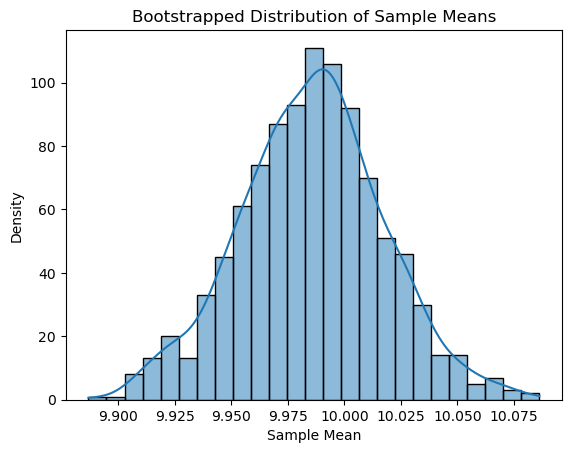

In [21]:
wrench_lengths = np.random.normal(loc=10, scale=1, size=1000)

# Draw some random sample with replacement and append mean to mean_lengths.
mean_lengths, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(wrench_lengths, replace=True, size=len(wrench_lengths))
    sample_mean = np.mean(temp_sample)
    mean_lengths.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_lengths)
boot_95_ci = np.percentile(mean_lengths, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

plot = sns.histplot(mean_lengths, kde=True)
plot.set_title("Bootstrapped Distribution of Sample Means")
plot.set_xlabel("Sample Mean")
plot.set_ylabel("Density")
plt.show()

**Non-standard Estimators**

Suppose you are studying the health of students. You are given the height and weight of 1000 students and are interested in the median height as well as the correlation between height and weight and the associated 95% CI for these quantities. Let's use bootstrapping.

Height Median CI = [4.96881447 5.11026071] 
Height Weight Correlation CI = [-0.08829312  0.03735432]


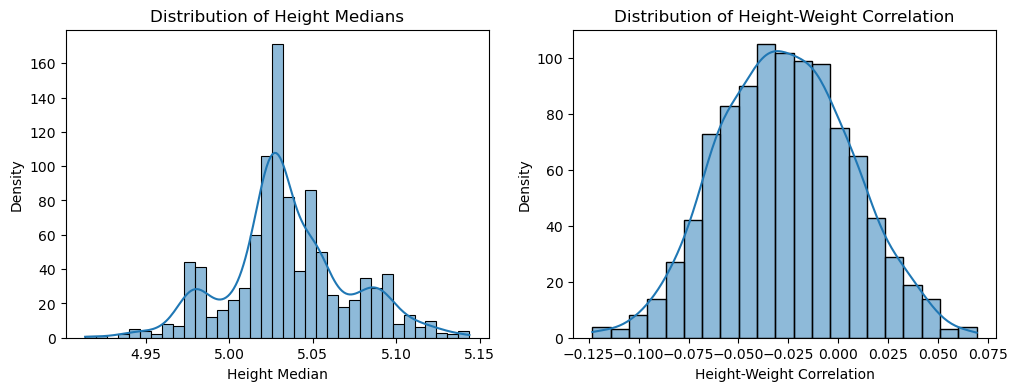

In [22]:
df = pd.DataFrame({'height': np.random.normal(loc=5, scale=1, size=1000),'weight': np.random.normal(loc=150, scale=20, size=1000)})

sims, data_size, height_medians, hw_corr = 1000, df.shape[0], [], []
for i in range(sims):
    tmp_df = df.sample(n=data_size, replace=True)
    height_medians.append(np.median(tmp_df.height))
    hw_corr.append(tmp_df.weight.corr(tmp_df.height))

# Calculate confidence intervals
height_median_ci = np.percentile(height_medians, [2.5, 97.5])
height_weight_corr_ci = np.percentile(hw_corr, [2.5, 97.5])
print("Height Median CI = {} \nHeight Weight Correlation CI = {}".format( height_median_ci, height_weight_corr_ci))

# Plot the distribution of height medians and height-weight correlation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(height_medians, kde=True, ax=ax[0])
ax[0].set_title("Distribution of Height Medians")
ax[0].set_xlabel("Height Median")
ax[0].set_ylabel("Density")
sns.histplot(hw_corr, kde=True, ax=ax[1])
ax[1].set_title("Distribution of Height-Weight Correlation")
ax[1].set_xlabel("Height-Weight Correlation")
ax[1].set_ylabel("Density")
plt.show()

**Bootstrapping regression**

Now let's see how bootstrapping works with regression. Bootstrapping helps estimate the uncertainty of non-standard estimators. Consider the 
$R^2$ statistic associated with a regression. When you run a simple least squares regression, you get a value for $R^2$. But let's see how can we get a 95% CI for $R^2$.

In [23]:
df = pd.DataFrame({'y': np.random.normal(loc=5, scale=1, size=1000),'x_1': np.random.normal(loc=150, scale=20, size=1000), 'x_2': np.random.normal(loc=150, scale=20, size=1000), 'intercept': np.ones(1000)})

rsquared_boot, coefs_boot, sims = [], [], 1000
reg_fit = sm.OLS(df['y'], df.iloc[:,1:]).fit()
# Run 1K iterations
for i in range(sims):
    # First create a bootstrap sample with replacement with n=df.shape[0]
    bootstrap = df.sample(replace=True, n=df.shape[0])
    # Fit the regression and append the r square to rsquared_boot
    rsquared_boot.append(sm.OLS(bootstrap['y'],bootstrap.iloc[:,1:]).fit().rsquared)

# Calculate 95% CI on rsquared_boot
r_sq_95_ci = np.percentile(rsquared_boot, [2.5, 97.5])
print("R Squared 95% CI = {}".format(r_sq_95_ci))


R Squared 95% CI = [0.00016962 0.01563578]


**Jackknife**

The jackknife is a resampling technique that can be used to estimate population parameters and test hypotheses. The jackknife works by removing one observation at a time from a dataset and calculating a statistic of interest on each sample. The jackknife distribution of the statistic is then constructed by collecting all the values of the statistic from each sample. The jackknife distribution can then be used to estimate the population parameters and test hypotheses.

Let's go back to the wrench factory example. Suppose you want to estimate the average length of the wrenches. You can use the jackknife to estimate the median length of the wrenches.

In [24]:
# Leave one observation out from wrench_lengths to get the jackknife sample and store the mean length
mean_lengths, n = [], len(wrench_lengths)
index = np.arange(n)

for i in range(n):
    jk_sample = wrench_lengths[index != i]
    mean_lengths.append(np.mean(jk_sample))

# The jackknife estimate is the mean of the mean lengths from each sample
mean_lengths_jk = np.mean(np.array(mean_lengths))
print("Jackknife estimate of the mean = {}".format(mean_lengths_jk))

Jackknife estimate of the mean = 9.986375952008093


In [25]:
# Leave one observation out to get the jackknife sample and store the median length
median_lengths = []
for i in range(n):
    jk_sample = wrench_lengths[index != i]
    median_lengths.append(np.median(jk_sample))

median_lengths = np.array(median_lengths)

# Calculate jackknife estimate and it's variance
jk_median_length = np.mean(median_lengths)
jk_var = (n-1)*np.var(median_lengths)

# Assuming normality, calculate lower and upper 95% confidence intervals
jk_lower_ci = jk_median_length - (1.96*np.sqrt(jk_var))
jk_upper_ci = jk_median_length + (1.96*np.sqrt(jk_var))
print("Jackknife 95% CI lower = {}, upper = {}".format(jk_lower_ci, jk_upper_ci))

Jackknife 95% CI lower = 9.855105677080994, upper = 10.068879720641133


**Permutation Testing**

Permutation testing, also known as randomization testing, is a non-parametric statistical technique used to test the significance of a hypothesis when the underlying population distribution is unknown or does not follow a specific distribution. The main idea behind permutation testing is to use the observed data to create a null distribution of test statistics under the null hypothesis, by randomly shuffling the data and recalculating the test statistic multiple times.

Here's how permutation testing works:

1. Define the null hypothesis: In permutation testing, the null hypothesis is the hypothesis that there is no difference between the groups being compared.

2. Calculate the test statistic: Calculate the test statistic using the observed data. This could be any statistic that measures the difference between the groups being compared, such as the mean, median, or correlation coefficient.

3. Randomly permute the data: Randomly shuffle the data between the groups, effectively breaking the association between the group labels and the values of the test statistic.

4. Recalculate the test statistic: Recalculate the test statistic for each permutation of the data.

5. Calculate the p-value: Calculate the p-value as the proportion of permutations that result in a test statistic equal to or more extreme than the observed test statistic.

6. Interpret the results: If the p-value is less than the significance level, reject the null hypothesis and conclude that there is a significant difference between the groups. Otherwise, fail to reject the null hypothesis and conclude that there is no significant difference between the groups.

Permutation testing is particularly useful when the assumptions of parametric tests, such as the t-test or ANOVA, are not met, or when the sample size is small. It can also be used to test complex hypotheses, such as those involving interactions or non-linear effects, that may not be easily tested using standard parametric tests. However, permutation testing can be computationally intensive, especially for large datasets or complex models.

In [26]:
donations_A = np.random.normal(loc=100, scale=10, size=500)
donations_B = np.random.normal(loc=100, scale=10, size=700)

# Concatenate the two arrays donations_A and donations_B into data
len_A, len_B = len(donations_A), len(donations_B)
data = np.concatenate([donations_A, donations_B])

# Get a single permutation of the concatenated length
perm = np.random.permutation(len(donations_A) + len(donations_B))

# Calculate the permutated datasets and difference in means
permuted_A = data[perm[:len(donations_A)]]
permuted_B = data[perm[len(donations_A):]]
diff_in_means = np.mean(permuted_A) - np.mean(permuted_B)
print("Difference in the permuted mean values = {}.".format(diff_in_means))

Difference in the permuted mean values = -0.011780980626866722.


**Hypothesis testing difference in means**

We want to test the hypothesis that there is a difference in the average donations received from A and B. Previously, you learned how to generate one permutation of the data. Now, we will generate a null distribution of the difference in means and then calculate the p-value.

For the null distribution, we first generate multiple permuted datasets and store the difference in means for each case. We then calculate the test statistic as the difference in means with the original dataset. Finally, we approximate the p-value by calculating twice the fraction of cases where the difference is greater than or equal to the absolute value of the test statistic (2-sided hypothesis). A p-value of less than say 0.05 could then determine statistical significance.

In [27]:
reps = 1000
# Generate permutations equal to the number of repetitions
perm = np.array([np.random.permutation(len(donations_A) + len(donations_B)) for i in range(reps)])
permuted_A_datasets = data[perm[:, :len(donations_A)]]
permuted_B_datasets = data[perm[:, len(donations_A):]]

# Calculate the difference in means for each of the datasets
samples = np.mean(permuted_A_datasets, axis=1) - np.mean(permuted_B_datasets, axis=1)

# Calculate the test statistic and p-value
test_stat = np.mean(donations_A) - np.mean(donations_B)
p_val = 2*np.sum(samples >= np.abs(test_stat))/reps
print("p-value = {}".format(p_val))

p-value = 0.362


**Hypothesis testing - Non-standard statistics**

Suppose that you're interested in understanding the distribution of the donations received from websites A and B. For this, you want to see if there's a statistically significant difference in the median and the 80th percentile of the donations. Permutation testing gives you a wonderfully flexible framework for attacking such problems.

Let's go through running a test to see if there's a difference in the median and the 80th percentile of the distribution of donations. As before, you're given the donations from the websites A and B in the variables `donations_A` and `donations_B` respectively.

In [28]:
# Calculate the difference in 80th percentile and median for each of the permuted datasets (A and B)
samples_percentile = np.percentile(permuted_A_datasets, 80, axis=1) - np.percentile(permuted_B_datasets, 80, axis=1)
samples_median = np.median(permuted_A_datasets, axis=1) - np.median(permuted_B_datasets, axis=1)

# Calculate the test statistic from the original dataset and corresponding p-values
test_stat_percentile = np.percentile(donations_A, 80) - np.percentile(donations_B, 80)
test_stat_median = np.median(donations_A) - np.median(donations_B)
p_val_percentile = 2*np.sum(samples_percentile >= np.abs(test_stat_percentile))/reps
p_val_median = 2*np.sum(samples_median >= np.abs(test_stat_median))/reps

print("80th Percentile: test statistic = {}, p-value = {}".format(test_stat_percentile, p_val_percentile))
print("Median: test statistic = {}, p-value = {}".format(test_stat_median, p_val_median))

80th Percentile: test statistic = 0.3600011780700214, p-value = 0.588
Median: test statistic = -0.8339651368151522, p-value = 0.3


## Advanced Applications of Simulation in Business Planning

**Modeling Corn Production**

Suppose that you manage a small corn farm and are interested in optimizing your costs. In this illustrative exercise, we will model the production of corn. We'll abstract away from details like units and focus on the process.

For simplicity, let's assume that corn production depends on only two factors: rain, which you don't control, and cost, which you control. Rain is normally distributed with mean 50 and standard deviation 15. For now, let's fix cost at 5,000. Let's assume that corn produced in any season is a Poisson random variable and that the average corn production is governed by the equation:

$$
100\times(\text{cost})^{0.1}\times(\text{rain})^{0.2}
$$

Let's model this production function and simulate one outcome.

In [38]:
# Initialize variables
cost = 5000
rain = np.random.normal(50,15)

# Corn Production Model
def corn_produced(rain, cost):
  mean_corn = 100 * (cost**0.1) * (rain**0.2)
  corn = np.random.poisson(mean_corn)
  return corn

# Simulate and print corn production
corn_result = corn_produced(rain, cost)
print(f"Simulated Corn Production = {(corn_result)}")

Simulated Corn Production = 523


In [39]:
def corn_demanded(price):
    mean_corn = 1000 - 8*price
    corn = np.random.poisson(abs(mean_corn))
    return corn

In [44]:
# Function to calculate profits
def profits(cost):
    rain = np.random.normal(50, 15)
    price = np.random.normal(40,10)
    supply = corn_produced(rain, cost)
    demand = corn_demanded(price)
    equil_short = supply <= demand
    if equil_short == True:
        tmp = supply*price - cost
        return tmp
    else: 
        tmp2 = demand*price - cost
        return tmp2
result = profits(cost)
print("Simulated profit = {}".format(result))

Simulated profit = 7949.255787153363


However, our profits depend on a number of factors, while we only control cost. Thus, we can simulate the uncertainty in the other factors and vary cost to see how our profits are impacted

Since you manage the small corn farm, you have the ability to choose your cost - from $100 to $5,000. You want to choose the cost that gives you the maximum average profit. In this exercise, we will simulate multiple outcomes for each cost level and calculate an average. We will then choose the cost that gives us the maximum mean profit. Upon completion, you will have a framework for selecting optimal inputs for business decisions.

In [46]:
sims, results = 1000, {}
cost_levels = np.arange(100, 5100, 100)

# For each cost level, simulate profits and store mean profit
for cost in cost_levels:
    tmp_profits = []
    for i in range(sims):
        tmp_profits.append(profits(cost))
    results[cost] = np.mean(tmp_profits)
    
# Get the cost that maximizes average profit
cost_max = [x for x in results.keys() if results[x] == max(results.values())][0]
print("Average profit is maximized when cost = {}".format(cost_max))

C:\Users\abdul\AppData\Local\Temp\ipykernel_10852\3558668584.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  corn = np.random.poisson(mean_corn)


Average profit is maximized when cost = 1100


**Monte Carlo Simulation**

Here we will evaluate a simple integral  $\int_0^1 x  e^{x} dx$. We know that the exact answer is $1$, but simulation will give us an approximate solution, so we can expect an answer close to $1$. As we saw in the video, it's a simple process. For a function of a single variable $F(x)$:

* Get the limits of the x-axis $(X_{min} , X_{max})$
$(\max(f(x)), \min(\min(f(x)), 0))$ and y-axis.

* Generate a number of uniformly distributed point in this box.
* Multiply the area of the box $(\max(f(x) - \min(f(x))\times(x_{max}-x_{min})
$ by the fraction of points that lie below $f(x)$.

Upon completion, we will have a framework for handling definite integrals using Monte Carlo Integration.

In [51]:
# Define the sim_integrate function
def sim_integrate(func, xmin, xmax, sims):
    x = np.random.uniform(xmin, xmax, sims)
    y = np.random.uniform(min(min(func(x)), 0), max(func(x)), sims)
    area = (max(y) - min(y))*(xmax-xmin)
    result = area * sum(abs(y) < abs(func(x)))/sims
    return result

# Call the sim_integrate function and print results
result = sim_integrate(func = lambda x: x*np.exp(x), xmin = 0, xmax = 1, sims = 50)
print("Simulated answer = {}, Actual Answer = 1".format(result))

Simulated answer = 0.5590687392388811, Actual Answer = 1


Now we work through a classic example - estimating the value of $\pi$.

Imagine a square of side $(0,0)$ with the origin as its center and the four corners having coordinates $(1, 1), (1, -1), (-1, 1), (-1, -1)$. The area of this square is $2 x 2 = 4$. Now imagine a circle of radius $1$ with its center at the origin fitting perfectly inside this square. The area of the circle will be $\pi \times \text{radius}^2 = \pi$.

To estimate $\pi$, we randomly sample multiple points in this square & get the fraction of points inside the circle $(x^2 + y^2 <= 1)$. The area of the circle then is 
 times this fraction, which gives us our estimate of 
.

In [ ]:
# Initialize sims and circle_points
sims, circle_points = 10000, 0

for i in range(sims):
    # Generate the two coordinates of a point
    point = np.random.uniform(-1,1,size=2)
    # if the point lies within the unit circle, increment counter
    within_circle = point[0]**2 + point[1]**2 <= 1
    if within_circle == True:
        circle_points +=1
        
# Estimate pi as 4 times the avg number of points in the circle.
pi_sim = 4*(circle_points/sims)
print("Simulated value of pi = {}".format(pi_sim))

### Power Analysis

**Power Analysis** is a statistical technique used to determine the sample size required to detect a statistically significant difference between two groups. It is particularly useful when the effect size is known, but the sample size is not. Power analysis can also be used to determine the effect size that can be detected with a given sample size.

Here's how power analysis works:

1. Define the null hypothesis: In power analysis, the null hypothesis is the hypothesis that there is no difference between the groups being compared.

2. Calculate the test statistic: Calculate the test statistic using the observed data. This could be any statistic that measures the difference between the groups being compared, such as the mean, median, or correlation coefficient.

3. Calculate the effect size: Calculate the effect size, which is the difference between the groups being compared. This could be the difference in means, the difference in medians, or the difference in correlation coefficients.

4. Calculate the power: Calculate the power as the probability of rejecting the null hypothesis when the null hypothesis is false.

5. Interpret the results: If the power is greater than or equal to the desired power, then the sample size is sufficient to detect the effect size. Otherwise, the sample size is insufficient to detect the effect size.

Power analysis is particularly useful when the sample size is small, or when the effect size is large. It can also be used to determine the effect size that can be detected with a given sample size.

Suppose that you are in charge of a news media website and you are interested in increasing the amount of time users spend on your website. Currently, the time users spend on your website is normally distributed with a mean of 1 minute and a standard deviation of 0.5 minutes. Suppose that you are introducing a feature that loads pages faster and want to know the sample size required to measure a 5% increase in time spent on the website.

In [133]:
# Initialize effect_size, control_mean, control_sd
effect_size, sample_size, control_mean, control_sd = 0.05, 50, 1, 0.5

# Simulate control_time_spent and treatment_time_spent, assuming equal variance
control_time_spent = np.random.normal(loc=control_mean, scale=control_sd, size=sample_size)
treatment_time_spent = np.random.normal(loc=control_mean*(1+effect_size), scale=control_sd, size=sample_size)

# Run the t-test and get the p_value
t_stat, p_value = st.ttest_ind(control_time_spent, treatment_time_spent)
stat_sig = p_value < 0.05
print(F"P-value: {p_value}, Statistically Significant? {stat_sig}")

P-value: 0.687145035889293, Statistically Significant? False


For our website, suppose we want to know how many people need to visit each variant, such that we can detect a 10% increase in time spent with 80% power. For this, we start with a small sample (50), simulate multiple instances of this experiment & check power. If 80% power is

In [135]:
sample_size = 50

# Keep incrementing sample size by 10 till we reach required power
while 1:
    control_time_spent = np.random.normal(loc=control_mean, scale=control_sd, size=(sample_size,sims))
    treatment_time_spent = np.random.normal(loc=control_mean*(1+effect_size), scale=control_sd, size=(sample_size,sims))
    t, p = st.ttest_ind(treatment_time_spent, control_time_spent)
    
    # Power is the fraction of times in the simulation when the p-value was less than 0.05
    power = (p < 0.05).sum()/len(p)
    if power >= 0.8: 
        break
    else: 
        sample_size += 10
print(f"For 80% power, sample size required = {sample_size}")

For 80% power, sample size required = 1570


### Portfolio Simulation

Suppose you have invested $10,000 in your portfolio comprising of multiple stocks. You want to evaluate the portfolio's performance over 10 years. You can tweak your overall expected rate of return and volatility (standard deviation of the rate of return). Assume the rate of return follows a normal distribution.

First, let's write a function that takes the principal (initial investment), number of years, expected rate of return and volatility as inputs and returns the portfolio's total value after 10 years.

Upon completion of this exercise, you will have a function you can call to determine portfolio performance.

In [143]:
# rates is a Normal random variable and has size equal to number of years
def portfolio_return(yrs, avg_return, volatility, principal):
    np.random.seed(123)
    rates = np.random.normal(loc=avg_return, scale=volatility, size=yrs)
    # Calculate the return at the end of the period
    end_return = principal
    for x in rates:
        end_return = end_return*(1+x)
    return end_return

result = portfolio_return(yrs = 5, avg_return = 0.07, volatility = 0.15, principal = 1000)
print(f"Portfolio return after 5 years = {result}")

Portfolio return after 5 years = 1021.4013412039292


Your stock-heavy portfolio has an initial investment of $10,000, an expected return of 7% and a volatility of 30%. You want to get a 95% confidence interval of what your investment will be worth in 10 years. We will simulate multiple samples of 10-year returns and calculate the confidence intervals on the distribution of returns.

In [145]:
# Run 1,000 iterations and store the results
sims, rets = 1000, []

for i in range(sims):
    rets.append(portfolio_return(yrs = 10, avg_return = 0.07, 
                                 volatility = 0.3, principal = 10000))

# Calculate the 95% CI
lower_ci = pd.Series(rets).quantile(0.025) #alternative: np.percentile(rets, 2.5)
upper_ci = pd.Series(rets).quantile(0.025) #alternative: np.percentile(rets, 97.5)
print(f"95% CI of Returns: Lower = {lower_ci}, Upper = {upper_ci}")

95% CI of Returns: Lower = 3859.345207073691, Upper = 3859.345207073691


Let's go back to our stock-heavy portfolio with an expected return of 7% and a volatility of 30%. We have the choice of rebalancing our portfolio with some bonds such that the expected return is 4% & volatility is 10%. We have a principal of $10,000. We want to select a strategy based on how much our portfolio will be worth in 10 years. Let's simulate returns for both the portfolios and choose based on the least amount you can expect with 75% probability (25th percentile).

In [ ]:
for i in range(sims):
    rets_stock.append(portfolio_return(yrs = 10, avg_return = 0.07, volatility = 0.3, principal = 10000))
    rets_bond.append(portfolio_return(yrs = 10, avg_return = 0.04, volatility = 0.1, principal = 10000))

# Calculate the 25th percentile of the distributions and the amount you'd lose or gain
rets_stock_perc = np.percentile(rets_stock,25)
rets_bond_perc = np.percentile(rets_bond, 25)
additional_returns = rets_stock_perc - rets_bond_perc
print("Sticking to stocks gets you an additional return of {}".format(additional_returns))

## Sampling with imbalanced data

**Imbalanced Data** refers to a situation where the number of observations in one class is significantly higher than the number of observations in the other classes. This is a common problem in many real-world applications, such as fraud detection, spam detection, and disease detection. In such cases, the classifier tends to predict the majority class, which is not very useful. In such cases, we need to use a different sampling technique such as stratified sampling and weighted sampling to obtain samples suited to the problem at hand.

If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

In [16]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop,'\n')

# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education')\
	.sample(frac=0.4, random_state=2022)

# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64 

Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64


If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

In [15]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
    .sample(n=30, random_state=2022)

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


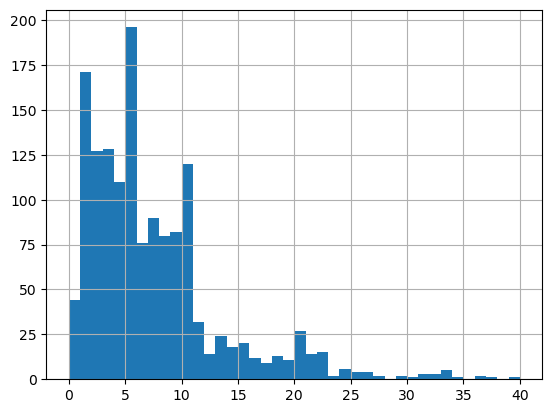

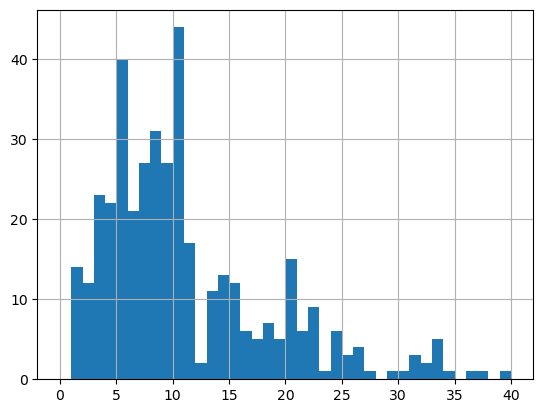

In [18]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0,41,1))
plt.show()

### Calculating Relative Errors

The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

The formula for relative error is:

$$\text{Relative Error} = \frac{\text{Absolute Error}}{\text{Population Parameter}}$$


In [42]:
mean_attrition_pop = attrition_pop['Attrition'].mean()

In [46]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = (abs(mean_attrition_pop - mean_attrition_srs50) / mean_attrition_pop) * 100

# Print rel_error_pct50
print(f'Relative error percentage of a sample of 50 is: {rel_error_pct50:.2f}%')

Relative error percentage of a sample of 50 is: 62.78%


In [48]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100,random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = (abs(mean_attrition_pop - mean_attrition_srs100) /mean_attrition_pop) * 100

# Print rel_error_pct100
print(f'Relative error percentage of a sample of 100 is: {rel_error_pct100:.2f}%')

Relative error percentage of a sample of 100 is: 6.96%


### Replicating Samples

When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many samples and calculate the sample mean (or another statistic) for each sample.

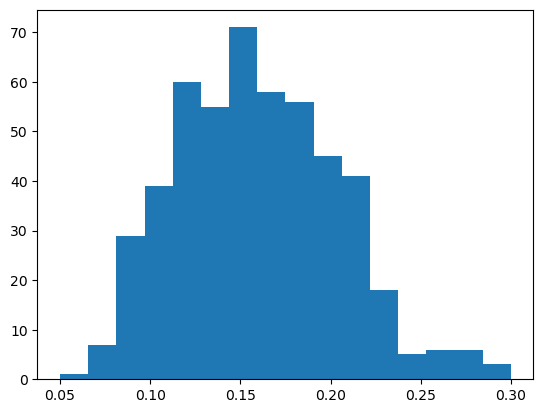

In [49]:
# Create an empty list
mean_attritions, sims = [], 500
# Loop 500 times to create 500 sample means
for i in range(sims):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)
 
# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16)
plt.show()

### Exact sampling distribution

To quantify how the point estimate (sample statistic) you are interested in varies, you need to know all the possible values it can take and how often. That is, you need to know its distribution.

The distribution of a sample statistic is called the sampling distribution. When we can calculate this exactly, rather than using an approximation, it is known as the exact sampling distribution.

Let's take another look at the sampling distribution of dice rolls. This time, we'll look at five eight-sided dice. (These have the numbers one to eight.)

In [50]:
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

In [55]:
dice = expand_grid({'die1' : [1,2,3,4,5,6,7,8],
                    'die2' : [1,2,3,4,5,6,7,8],
                    'die3' : [1,2,3,4,5,6,7,8],
                    'die4' : [1,2,3,4,5,6,7,8],
                    'die5' : [1,2,3,4,5,6,7,8],
                    })

print(dice)

       die1  die2  die3  die4  die5
0         1     1     1     1     1
1         1     1     1     1     2
2         1     1     1     1     3
3         1     1     1     1     4
4         1     1     1     1     5
...     ...   ...   ...   ...   ...
32763     8     8     8     8     4
32764     8     8     8     8     5
32765     8     8     8     8     6
32766     8     8     8     8     7
32767     8     8     8     8     8

[32768 rows x 5 columns]


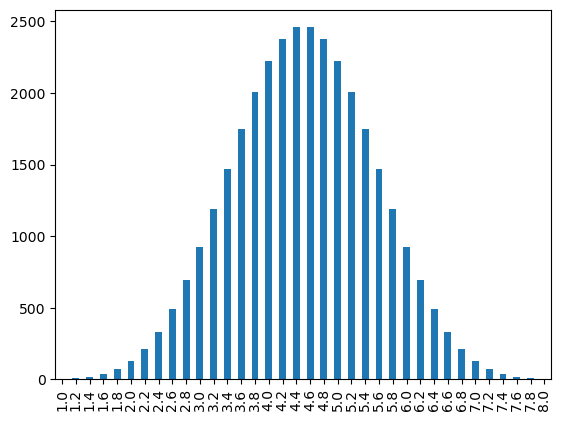

In [61]:
# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] =  (dice['die1'] + dice['die2'] + dice['die3'] + dice['die4'] + dice['die5']) / 5
                     
                    
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

### Generating an approximate sampling distribution

Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is $8^5$, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

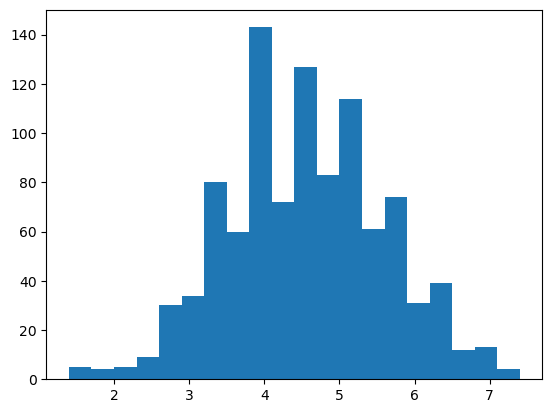

In [62]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000,bins=20)
plt.show()